In [56]:
%load_ext autoreload
%autoreload 2

import os
import csv
import numpy as np
import pandas as pd
import global_settings as gs
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:

# Specify the path to your CSV file
filename = "Masterthesis_Survey2024-01-22_09_39_07.csv"

path = os.path.join(gs.base_result_path, filename)

survey_result_dict = {}

# ---------------------------------------------------------

keys = []

with open(path, 'r') as file:

    csv_reader = csv.reader(file)

    for idx, row in enumerate(csv_reader):
        print(row)

        if idx == 0:
            for word_idx, word in enumerate(row):
                key = f"{word_idx}_{word}"
                keys.append(key)
                survey_result_dict[key] = []

        else:
            for val_idx, value in enumerate(row):
                survey_result_dict[keys[val_idx]].append(value)


['\ufeff"Submission Date"', 'Country of residence', 'What is your professional background?', 'What is your role?', 'How many years of experience do you have in EEG analysis and processing?', 'How would you rate your experience with the neural correlates of internally and externally directed attention?', 'To what extent does the PSD pattern align with your expectations given the task?', 'To what extent does the relevance heatmap correctly identify regions and frequencies that are related to the task?', 'To what extent does the PSD pattern align with your expectations given the task?', 'To what extent does the relevance heatmap correctly identify regions and frequencies that are related to the task?', 'Here you can optionally share your reasoning, dataset related feedback and other comments.', 'To what extent does the PSD pattern align with your expectations given the task?', 'To what extent does the relevance heatmap correctly identify regions and frequencies that are related to the tas

In [90]:
skip_indices = ["0","1","2","3","4","5","10","15","16","21","22","23"]

index_key_map = {
    "6": "IEA_PSD_0",
    "7": "IEA_HM_0",
    "8": "IEA_PSD_1",
    "9": "IEA_HM_1",

    "11": "KUL_PSD_0",
    "12": "KUL_HM_0",
    "13": "KUL_PSD_1",
    "14": "KUL_HM_1",

    "17": "CHO_PSD_0",
    "18": "CHO_HM_0",
    "19": "CHO_PSD_1",
    "20": "CHO_HM_1"
}

res_dict = {} 

for k,v in survey_result_dict.items():

    start = k.split("_")[0]

    if start in list(index_key_map.keys()):
        new_key = index_key_map[start]
        v = [int(v_) for v_ in v]
        res_dict[new_key] = v


In [91]:
for k,v in res_dict.items():
    print(k, v)
    print()

IEA_PSD_0 [3]

IEA_HM_0 [3]

IEA_PSD_1 [4]

IEA_HM_1 [3]

KUL_PSD_0 [3]

KUL_HM_0 [2]

KUL_PSD_1 [3]

KUL_HM_1 [2]

CHO_PSD_0 [4]

CHO_HM_0 [4]

CHO_PSD_1 [4]

CHO_HM_1 [4]



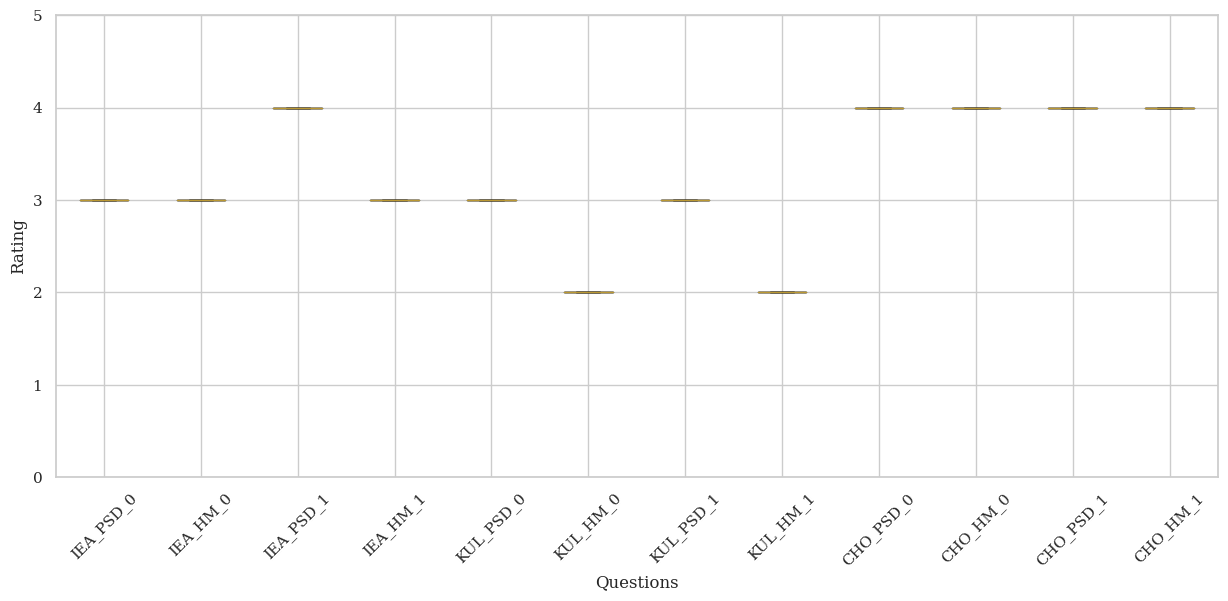

In [103]:

# Your dictionary
data = res_dict

# Your dictionary with lists as values
data = res_dict

# Extract keys and values
labels = list(data.keys())
values = list(data.values())
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Plotting the box plots

bp = plt.boxplot(values, labels=labels, widths=0.5)

plt.ylim(0, 5)
# Adding labels and title
plt.xlabel('Questions')
plt.ylabel('Rating')

plt.xticks(rotation=45)


# Display the chart
plt.show()


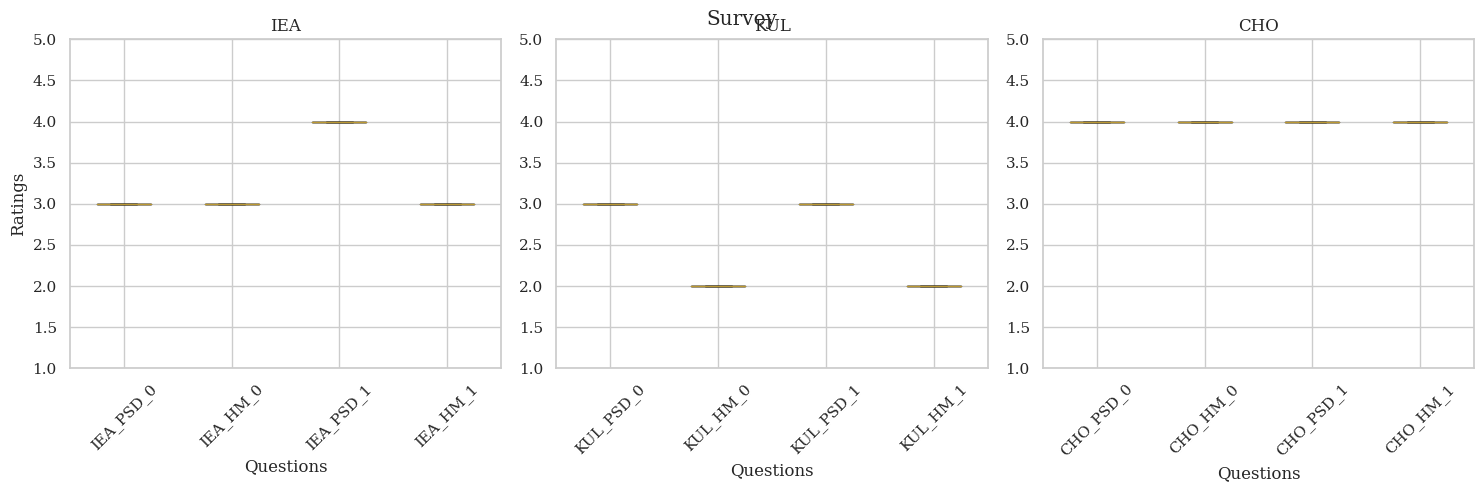

In [108]:
import matplotlib.pyplot as plt

# Your dictionary with lists as values
data = res_dict

# Extract keys and values
labels = list(data.keys())
values = list(data.values())

# Set the number of subplots and their arrangement
num_subplots = 3
rows = 1
cols = num_subplots

ds_names = ["IEA", "KUL", "CHO"]

# Increase the size of the figure
fig, axs = plt.subplots(rows, cols, figsize=(15, 5))  # Adjust width and height as needed

# Iterate over the subplots and plot the corresponding box plots
for i in range(num_subplots):
    start_index = i * (len(labels) // num_subplots)
    end_index = (i + 1) * (len(labels) // num_subplots)
    labels_subset = labels[start_index:end_index]
    values_subset = [data[label] for label in labels_subset]
    
    positions = range(1, len(labels_subset) + 1)
    
    axs[i].boxplot(values_subset, positions=positions, widths=0.5)
    
    axs[i].set_xticks(positions)
    axs[i].set_xticklabels(labels_subset, rotation=45)
    axs[i].set_ylim(1, 5)

    if i == 0:
        axs[i].set_ylabel('Ratings')
    
    axs[i].set_xlabel('Questions')
    axs[i].set_title(ds_names[i])

# Adjust layout for better spacing
plt.tight_layout()

plt.suptitle("Survey", y=1.05)

plt.show()
